<a href="https://colab.research.google.com/github/erico07181/NesquickRabbit1/blob/main/Copy_of_%5BF22_DS%5D_Quiz_3_B_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [F22-DS] Quiz 3 - B-Trees

## **Before you start**

Make a copy of this Colab by clicking on File > Save a Copy in Drive

After making a copy, add your student id, last name, and first name to the title.

In [ ]:
#@title  { run: "auto", display-mode: "form" }
first_name = "Enrique " #@param {type:"string"}
last_name = "Rico" #@param {type:"string"}
email_address = "earico@miners.utep.edu" #@param {type:"string"}

### [20 points] Problem 1

Complete the implementation of the method *largest_at_depth* that receives an integer *d* and returns the largest key in the tree that has depth *d*.



### [20 points] Problem 2

Complete the implementation of the method *num_nodes_at_depth* that receives an integer *d* and returns the number of nodes at depth *d*.



### [20 points] Problem 3

Complete the implementation of the method *key_depth* that receives a key *k* and returns the depth at which *k* is found in the tree, or -1 if *k* is not in the tree. To receive credit, you must take advantage of the fact that a B-Tree is a search tree. If you make unnecesary recursive calls, you will not earn any points. 




### [20 points] Problem 4

Complete the implementation of the method *num_full_nodes*. This method returns the number of nodes in the tree that are full (length of keys list is equal to the maximum number of keys they can hold).



### [20 points] Problem 5

Complete the implementation of the method *num_keys_larger_than*. This method receives a key *k* as input and returns the number of keys in the tree that are larger than than *k*. To receive credit, you must take advantage of the fact that a B-Tree is a search tree. If you make unnecesary recursive calls, you will not earn any points. 



**For all coding questions, feel free to write helper methods, if necessary**

In [8]:
# Code to implement a B-tree
# Programmed by Olac Fuentes
# Modified by Diego Aguirre & Daniel Mejia on November 8, 2022


import matplotlib.pyplot as plt


class BTreeNode:
    # Constructor
    def __init__(self, keys=None, children=None, is_leaf=True, max_num_keys=5):
        self.keys = keys if keys else []
        self.children = children if children else []
        self.is_leaf = is_leaf
        if max_num_keys < 3:  # max_num_keys must be odd and greater or equal to 3
            max_num_keys = 3
        if max_num_keys % 2 == 0:  # max_num_keys must be odd and greater or equal to 3
            max_num_keys += 1
        self.max_num_keys = max_num_keys

    def is_full(self):
        return len(self.keys) >= self.max_num_keys


class BTree:
    # Constructor
    def __init__(self, max_num_keys=5):
        self.max_num_keys = max_num_keys
        self.root = BTreeNode(max_num_keys=max_num_keys)

  # --------------------------------------------------------------------------------------------------------------
  # Problem 1
  # --------------------------------------------------------------------------------------------------------------
    def largest_at_depth(self, d):
      return self._largest_at_depth(d, self.root)


    def _largest_at_depth(self, d, root):
      if root is None:
        return float("inf")
      if d == 0:
        return root.keys[-1]
      return self._largest_at_depth(d-1, root.children[-1])

  # --------------------------------------------------------------------------------------------------------------
  # Problem 2
  # --------------------------------------------------------------------------------------------------------------
   
    
    def num_nodes_at_depth(self, d):
      return self._num_nodes_at_depth(d, self.root)

    def _num_nodes_at_depth(self, d, root):
      if root is None:
        return float("inf")

      if root.is_leaf:
        return 1
      if d == 0:
        return 1
      sum = 0
      for i in range(len(root.children)):
        sum += self._num_nodes_at_depth(d-1, root.children[i])
      return sum

  # --------------------------------------------------------------------------------------------------------------
  # Problem 3
  # --------------------------------------------------------------------------------------------------------------
    def key_depth(self, k):
      return self._key_depth(k, self.root)

    def _key_depth(self, k, root):
      dist = -1
      if root is None:
        return dist
      
      if k in root.keys:
        return 0

      if root.is_leaf:
        return -1
      return 1 + self._key_depth(k, root.children[self.find_child(k, root)])

  # --------------------------------------------------------------------------------------------------------------
  # Problem 4
  # --------------------------------------------------------------------------------------------------------------
    def num_full_nodes(self):
      return self._num_full_nodes(self.root)
    
    def _num_full_nodes(self, root):
      if root is None:
        return 0
      
      sum = 0
      if len(root.keys) == root.max_num_keys:
        sum = 1
      
      for i in range(len(root.children)):
        sum += self._num_full_nodes(root.children[i])
      
      return sum
  # --------------------------------------------------------------------------------------------------------------
  # Problem 5
  # --------------------------------------------------------------------------------------------------------------
    def num_keys_larger_than(self, k):
      return self._num_keys_larger_than(k, self.root)

    def _num_keys_larger_than(self, k, root):
      if root is None:
        return 0
      


  # --------------------------------------------------------------------------------------------------------------
  # These functions are already defined. You may use them as you see appropriate.
  # DO NOT modify any of the functions below
  # --------------------------------------------------------------------------------------------------------------
  
    def find_child(self, k, node):
        # Determines value of c, such that k must be in subtree node.children[c], if k is in the BTree
        for i in range(len(node.keys)):
            if k < node.keys[i]:
                return i
        return len(node.keys)

    def insert_internal(self, i, node):

        # node cannot be Full 
        if node.is_leaf:
            self.insert_leaf(i, node)
        else:
            k = self.find_child(i, node)
            if node.children[k].is_full():
                m, l, r = self.split(node.children[k])
                node.keys.insert(k, m)
                node.children[k] = l
                node.children.insert(k + 1, r)
                k = self.find_child(i, node)
            self.insert_internal(i, node.children[k])

    def split(self, node):

        mid = node.max_num_keys // 2
        if node.is_leaf:
            left_child = BTreeNode(node.keys[:mid], max_num_keys=node.max_num_keys)
            right_child = BTreeNode(node.keys[mid + 1:], max_num_keys=node.max_num_keys)
        else:
            left_child = BTreeNode(node.keys[:mid], node.children[:mid + 1], node.is_leaf, max_num_keys=node.max_num_keys)
            right_child = BTreeNode(node.keys[mid + 1:], node.children[mid + 1:], node.is_leaf, max_num_keys=node.max_num_keys)
        return node.keys[mid], left_child, right_child

    def insert_leaf(self, i, node):
        node.keys.append(i)
        node.keys.sort()

    def leaves(self):
        return self._leaves(self.root)

    def _leaves(self, node):
        # Returns the leaves in a b-tree
        if node.is_leaf:
            return [node.keys]
        s = []
        for c in node.children:
            s = s + self._leaves(c)
        return s

    def insert(self, i):
        self._insert(i, self.root)

    def _insert(self, i, node):

        if not node.is_full():
            self.insert_internal(i, node)
        else:
            m, l, r = self.split(node)
            node.keys = [m]
            node.children = [l, r]
            node.is_leaf = False
            k = self.find_child(i, node)
            self.insert_internal(i, node.children[k])

    def height(self):
        return self._height(self.root)

    def _height(self, node):
        if node.is_leaf:
            return 0
        return 1 + self._height(node.children[0])

    def print(self):
        self._print(self.root)

    def _print(self, node):
        # Prints keys in tree in ascending order
        if node.is_leaf:
            for t in node.keys:
                print(t, end=' ')
        else:
            for i in range(len(node.keys)):
                self._print(node.children[i])
                print(node.keys[i], end=' ')
            self._print(node.children[len(node.keys)])

    def print_d(self, space):
        self._print_d(space, self.root)

    def _print_d(self, space, node=None):

        # Prints keys and structure of B-tree
        if node.is_leaf:
            for i in range(len(node.keys) - 1, -1, -1):
                print(space, node.keys[i])
        else:
            self._print_d(space + '   ', node.children[len(node.keys)])
            for i in range(len(node.keys) - 1, -1, -1):
                print(space, node.keys[i])
                self._print_d(space + '   ', node.children[i])

    def search(self, k):
        return self._search(k, self.root)

    def _search(self, k, node):
        # Returns node where k is, or None if k is not in the tree
        if k in node.keys:
            return node
        if node.is_leaf:
            return None
        return self._search(k, node.children[self.find_child(k, node)])

    def _set_x(self, dx, node=None):
        if node is None:
            node = self.root
        # Finds x-coordinate to display each node in the tree
        if node.is_leaf:
            return
        else:
            for c in node.children:
                self._set_x(dx, c)
            d = (dx[node.children[0].keys[0]] + dx[node.children[-1].keys[0]] + 10 * len(node.children[-1].keys)) / 2
            dx[node.keys[0]] = d - 10 * len(node.keys) / 2

    def _draw_btree(self, dx, y, y_inc, fs, ax, node):

        # Function to display b-tree to the screen
        # It works fine for trees with up to about 70 keys
        xs = dx[node.keys[0]]
        if node.is_leaf:
            for itm in node.keys:
                ax.plot([xs, xs + 10, xs + 10, xs, xs], [y, y, y - 10, y - 10, y], linewidth=1, color='k')
                ax.text(xs + 5, y - 5, str(itm), ha="center", va="center", fontsize=fs)
                xs += 10
        else:
            for i in range(len(node.keys)):
                xc = dx[node.children[i].keys[0]] + 5 * len(node.children[i].keys)
                ax.plot([xs, xs + 10, xs + 10, xs, xs], [y, y, y - 10, y - 10, y], linewidth=1, color='k')
                ax.text(xs + 5, y - 5, str(node.keys[i]), ha="center", va="center", fontsize=fs)
                ax.plot([xs, xc], [y - 10, y - y_inc], linewidth=1, color='k')
                self._draw_btree(dx, y - y_inc, y_inc, fs, ax, node.children[i])
                xs += 10
            xc = dx[node.children[-1].keys[0]] + 5 * len(node.children[-1].keys)
            ax.plot([xs, xc], [y - 10, y - y_inc], linewidth=1, color='k')
            self._draw_btree(dx, y - y_inc, y_inc, fs, ax, node.children[-1])

    def draw(self):
        # Find x-coordinates of leaves
        ll = self.leaves()
        dx = {}
        d = 0
        for l in ll:
            dx[l[0]] = d
            d += 10 * (len(l) + 1)
            # Find x-coordinates of internal nodes
        self._set_x(dx)
        # plt.close('all')
        fig, ax = plt.subplots()
        self._draw_btree(dx, 0, 30, 10, ax, self.root)
        ax.set_aspect(1.0)
        ax.axis('off')
        plt.show()

## Autograder


-- B-Trees Section --
[Problem 1] 20.0 / 20
Problem 2 - Error - Your code output: 4  Expected output:  8  Input: d = 2


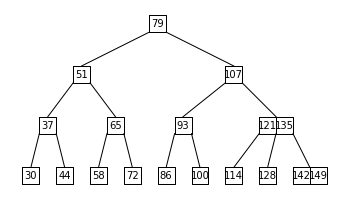

[Problem 2] 15.0 / 20
Problem 3 - Error - Your code output: 1  Expected output:  -1  Input: key = 18


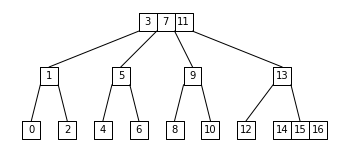

[Problem 3] 15.0 / 20
[Problem 4] 20.0 / 20
Problem 5 - Error - Your code output: None  Expected output:  0  Input: key = 18


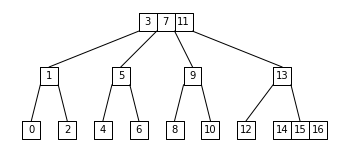

Problem 5 - Error - Your code output: None  Expected output:  12  Input: key = 5


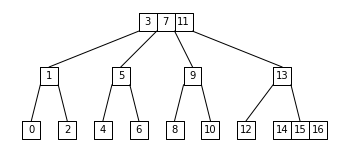

Problem 5 - Error - Your code output: None  Expected output:  8  Input: key = 93


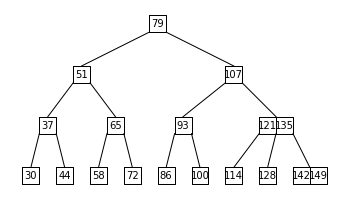

Problem 5 - Error - Your code output: None  Expected output:  16  Input: key = 37


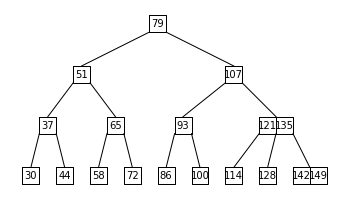

[Problem 5] 0.0 / 20
245.0


In [9]:
CODING_POINTS = 20

def grade_btrees():
  print("\n-- B-Trees Section --")

  section_points = 0
  total_points = 0

  # --------------------------------------------------------------------------------------------------------------
  # Problem 1 - largest_at_depth(self,d)
  # --------------------------------------------------------------------------------------------------------------
  passed_tests = 0
  num_tests = 4

  try:
      def check_answer(tree, d, ans):
        output = tree.largest_at_depth(d)
        if output == ans:
          return 1

        print("Problem 1 - Error - Your code output:", output, " Expected output: ", ans, " Input:")
        tree.draw()
        return 0

      #Test A
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(17):
        btree1.insert(i)
      d=1
      passed_tests += check_answer(btree1, d, 13)

      #Test B
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(17):
        btree1.insert(i)
      d=2
      passed_tests += check_answer(btree1, d, 16)

      #Test C
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(30,150,7):
        btree1.insert(i)
      d=2
      passed_tests += check_answer(btree1, d, 135)

      #Test D
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(30,150,7):
        btree1.insert(i)
      d=1
      passed_tests += check_answer(btree1, d, 107)


  except Exception as ex:
      print("[Problem 1] Exception thrown: ", ex)

  problem_points = (passed_tests / num_tests) * CODING_POINTS

  print("[Problem 1]", problem_points, "/", CODING_POINTS)

  section_points += problem_points
  total_points += section_points

# --------------------------------------------------------------------------------------------------------------
# Problem 2 - num_nodes_at_depth
# --------------------------------------------------------------------------------------------------------------
  passed_tests = 0
  num_tests = 4

  try:
      def check_answer(tree, d, ans):
        output = tree.num_nodes_at_depth(d)
        if output == ans:
          return 1

        print("Problem 2 - Error - Your code output:", output, " Expected output: ", ans, " Input: d =",d)
        tree.draw()
        return 0

      #Test A
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(17):
        btree1.insert(i)
      d=1
      passed_tests += check_answer(btree1, d, 4)

      #Test B
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(17):
        btree1.insert(i)
      d=1
      passed_tests += check_answer(btree1, d, 4)

      #Test C
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(30,150,7):
        btree1.insert(i)
      d=2
      passed_tests += check_answer(btree1, d, 8)

      #Test D
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(30,150,7):
        btree1.insert(i)
      d=2
      passed_tests += check_answer(btree1, d, 4)
      


  except Exception as ex:
      print("[Problem 2] Exception thrown: ", ex)

  problem_points = (passed_tests / num_tests) * CODING_POINTS

  print("[Problem 2]", problem_points, "/", CODING_POINTS)

  section_points += problem_points
  total_points += section_points
# --------------------------------------------------------------------------------------------------------------
# Problem 3 - key_depth
# --------------------------------------------------------------------------------------------------------------
  passed_tests = 0
  num_tests = 4

  try:
      def check_answer(tree, k, ans):
        output = tree.key_depth(k)
        if output == ans:
          return 1

        print("Problem 3 - Error - Your code output:", output, " Expected output: ", ans, " Input: key =",k)
        tree.draw()
        return 0

      #Test A
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(17):
        btree1.insert(i)
      key=18
      passed_tests += check_answer(btree1, key, -1)

      #Test B
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(17):
        btree1.insert(i)
      key=12
      passed_tests += check_answer(btree1, key, 2)

      #Test C
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(30,150,7):
        btree1.insert(i)
      key=72
      passed_tests += check_answer(btree1, key, 3)

      #Test D
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(30,150,7):
        btree1.insert(i)
      key = 79
      passed_tests += check_answer(btree1, key, 0)

      
  except Exception as ex:
      print("[Problem 3] Exception thrown: ", ex)

  problem_points = (passed_tests / num_tests) * CODING_POINTS

  print("[Problem 3]", problem_points, "/", CODING_POINTS)

  section_points += problem_points
  total_points += section_points

# --------------------------------------------------------------------------------------------------------------
# Problem 4 - num_full_nodes
# --------------------------------------------------------------------------------------------------------------

  passed_tests = 0
  num_tests = 4

  try:
      def check_answer(tree, ans):
        output = tree.num_full_nodes()
        if output == ans:
          return 1

        print("Problem 4 - Error - Your code output:", output, " Expected output: ", ans)
        tree.draw()
        return 0

      #Test A
      max_num_keys = 7
      btree1 = BTree(max_num_keys)
      for i in range(31):
        btree1.insert(i)
      passed_tests += check_answer(btree1, 1)

      #Test B
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(2):
        btree1.insert(i)
      passed_tests += check_answer(btree1, 0)

      #Test C
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(3):
        btree1.insert(i)
      passed_tests += check_answer(btree1, 1)

      #Test D
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(17):
        btree1.insert(i)
      passed_tests += check_answer(btree1, 2)

      
  except Exception as ex:
      print("[Problem 4] Exception thrown: ", ex)

  problem_points = (passed_tests / num_tests) * CODING_POINTS

  print("[Problem 4]", problem_points, "/", CODING_POINTS)

  section_points += problem_points
  total_points += section_points

# --------------------------------------------------------------------------------------------------------------
# Problem 5 - num_keys_larger_than
# --------------------------------------------------------------------------------------------------------------

  passed_tests = 0
  num_tests = 4

  try:
      def check_answer(tree, k, ans):
        output = tree.num_keys_larger_than(k)
        if output == ans:
          return 1

        print("Problem 5 - Error - Your code output:", output, " Expected output: ", ans, " Input: key =",k)
        tree.draw()
        return 0

      #Test A
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(17):
        btree1.insert(i)
      key=18
      passed_tests += check_answer(btree1, key, 0)

      #Test B
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(17):
        btree1.insert(i)
      key=5
      passed_tests += check_answer(btree1, key, 12)

      #Test C
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(30,150,7):
        btree1.insert(i)
      key=93
      passed_tests += check_answer(btree1, key, 8)

      #Test D
      max_num_keys = 3
      btree1 = BTree(max_num_keys)
      for i in range(30,150,7):
        btree1.insert(i)
      key = 37
      passed_tests += check_answer(btree1, key, 16)

      
  except Exception as ex:
      print("[Problem 5] Exception thrown: ", ex)

  problem_points = (passed_tests / num_tests) * CODING_POINTS

  print("[Problem 5]", problem_points, "/", CODING_POINTS)

  section_points += problem_points
  total_points += section_points

  return total_points

points_earned = grade_btrees()
print(points_earned)

## How to Submit 

1. File > Download .ipynb
2. Go to Blackboard, find the submission page, and upload the .ipynb file you just downloaded.